In [64]:
import pandas as pd
import numpy as np
import librosa
import librosa.display
import glob
import warnings
import IPython.display as ipd
import matplotlib.pyplot as plt
from tqdm import tqdm
import tensorflow as tf
from tensorflow.python.keras.api import keras

%matplotlib inline

warnings.filterwarnings("ignore")

In [65]:
meta = pd.read_json("./audioMNIST_meta.txt")

In [66]:
meta.head()

,1,2,3,4,5,6,7,8,9,10,...,51,52,53,54,55,56,57,58,59,60
accent,german,German,German,German,German,German,German/Spanish,German,South Korean,German,...,German,French,German,German,German,German,German,German,German,Tamil
age,30,25,31,23,25,25,27,41,35,36,...,26,34,24,27,23,24,27,29,31,27
gender,male,male,male,male,male,male,male,male,male,male,...,male,female,male,male,male,female,female,female,female,female
native speaker,no,no,no,no,no,no,no,no,no,no,...,no,no,no,no,no,no,no,no,no,yes
origin,"Europe, Germany, Wuerzburg","Europe, Germany, Hamburg","Europe, Germany, Bremen","Europe, Germany, Helmstedt","Europe, Germany, Hameln","Europe, Germany, Dortmund","Europe, Spanien, Mallorca","Europe, Germany, Ludwigsfelde","Asia, South Korea, Seoul","Europe, Germany, Lemgo",...,"Europe, Germany, Bremen","Europe, France, Montpellier","Europe, Germany, Reutlingen","Europe, Germany, Berlin","Europe, Germany, Dresden","Europe, Germany, Muenster","Europe, Germany, Berlin","Europe, Germany, Berlin","Europe, Germany, Berlin","Asia, India, Chennai"


In [67]:
gender_map = np.vstack((meta.loc["gender"],meta.loc["gender"].index))
gender_map = gender_map.T
gender_map = pd.DataFrame(gender_map,columns=["gender","class"])
gender_map.head(5)

,gender,class
0,male,1
1,male,2
2,male,3
3,male,4
4,male,5


In [68]:
meta.columns

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
            52, 53, 54, 55, 56, 57, 58, 59, 60],
           dtype='int64')

In [69]:
sample,sr = librosa.load("./data/01/0_01_1.wav")

In [70]:
sample = np.array(sample, dtype="float64") #array of the audio file

In [71]:
sr

22050

In [72]:
ipd.Audio("./data/01/0_01_0.wav")

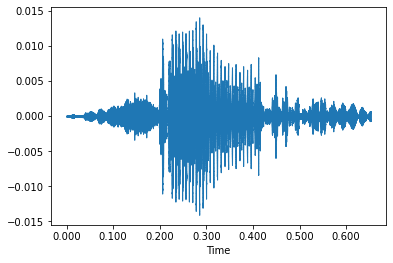

In [73]:
librosa.display.waveshow(sample, sr=sr)

Mapping Gender to the filenames

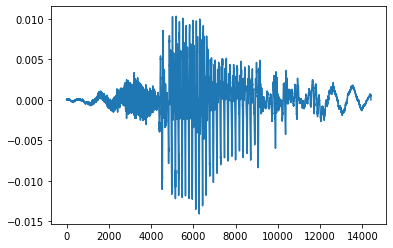

In [74]:
plt.plot(sample)

Map filenames and class

In [75]:
gender_map.iloc[0].gender

'male'

In [76]:
def feature_extractor(file):
    audio, sample_rate = librosa.load(file, res_type="kaiser_fast")
    mfcc_features = librosa.feature.mfcc(y=audio, sr=sample_rate,n_mfcc=50)
    mfcc_features_scaled = np.mean(mfcc_features.T, axis=0)
    return mfcc_features_scaled

In [77]:
glob.glob("./data/01/*.wav")[0]

'./data/01/3_01_10.wav'

In [78]:
# extracted_feautures = []

# dirs = glob.glob("./data/*")
# for i, dir in enumerate(dirs):
#     for file in tqdm(glob.glob(dir+"/*.wav")):
#         label = gender_map.iloc[i].gender
#         features = feature_extractor(file)
#         extracted_feautures.append([features,label])
        

In [79]:
# extracted_feautures[0]

In [80]:
# data = pd.DataFrame(extracted_feautures, columns=["features", "labels"])

In [81]:
# data.head()

In [82]:
# X = data.features.tolist()


# np.savetxt("features.txt",X)


In [83]:
# label_map = {"male":0,"female":1}
# y = data.labels.map(label_map).tolist()
# np.savetxt("labels.txt",y)

In [84]:
X = np.loadtxt("./features.txt")
y = np.loadtxt("./labels.txt")
y = pd.get_dummies(y)

In [85]:
X.shape

(30000, 50)

In [154]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [87]:
def build_model():
    model = keras.Sequential([
        keras.layers.Dense(100, activation="relu",input_shape=(50,)),
        # keras.layers.Dropout(0.3),
        keras.layers.Dense(200, activation="relu"),
        # keras.layers.Dropout(0.3),
        keras.layers.Dense(2, activation="softmax")
    ])
    model.compile(loss="categorical_crossentropy",
                optimizer=keras.optimizers.Adam(),
                metrics = ["accuracy"])
    return model


In [88]:
model = build_model()
history = model.fit(X_train,y_train, epochs=5)

Epoch 1/5
 19/750 [..............................] - ETA: 4s - loss: 5.1661 - accuracy: 0.6842 

2022-02-15 16:58:12.043794: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


750/750 [==============================] - 5s 6ms/step - loss: 0.8142 - accuracy: 0.7884
Epoch 2/5
750/750 [==============================] - 5s 6ms/step - loss: 0.4291 - accuracy: 0.8471
Epoch 3/5
750/750 [==============================] - 4s 6ms/step - loss: 0.3494 - accuracy: 0.8725
Epoch 4/5
750/750 [==============================] - 5s 6ms/step - loss: 0.2591 - accuracy: 0.8995
Epoch 5/5
750/750 [==============================] - 5s 6ms/step - loss: 0.2180 - accuracy: 0.9131


In [89]:
model.evaluate(X_test,y_test)

 24/188 [==>...........................] - ETA: 1s - loss: 0.1685 - accuracy: 0.9349

2022-02-15 16:58:35.120160: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


188/188 [==============================] - 1s 6ms/step - loss: 0.1721 - accuracy: 0.9350


[0.17214904725551605, 0.9350000023841858]

ART

In [90]:
from art.estimators.classification import KerasClassifier
from art.attacks.evasion import FastGradientMethod

In [91]:
# tf.compat.v1.disable_eager_execution()

In [92]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_7 (Dense)              (None, 200)               20200     
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 402       
Total params: 25,702
Trainable params: 25,702
Non-trainable params: 0
_________________________________________________________________


In [93]:
model2 = build_model()
model2.build()
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_10 (Dense)             (None, 200)               20200     
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 402       
Total params: 25,702
Trainable params: 25,702
Non-trainable params: 0
_________________________________________________________________


In [94]:
import art
art.__version__

'1.9.0'

In [95]:
# classifier = KerasClassifier(model=model)

In [96]:
# with tf.device("/CPU:0"):
#     attack = FastGradientMethod(estimator=classifier)
#     X_test_adv = attack.generate(X_test)

In [97]:
import foolbox as fb
from foolbox.models import TensorFlowModel
from foolbox.attacks import fast_gradient_method

In [111]:
fb_model = TensorFlowModel(model,bounds=(-10,10))

2022-02-15 17:01:51.180376: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-02-15 17:01:51.180401: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [155]:
X_test = tf.constant(X_test, dtype=tf.float32)
y_test = np.array(y_test,dtype="int32")
y_test_ = np.argmax(y_test,axis=1)
y_test_coded = np.array(y_test_,dtype=np.int64)
y_test_coded = tf.constant(y_test_coded,dtype=tf.int32)

In [156]:
fb.utils.accuracy(fb_model, X_test,y_test_coded)

0.9350000023841858

In [157]:
attack1 =  fb.attacks.LinfFastGradientAttack()

In [158]:
raw,clipped,is_adv = attack1(fb_model,X_test,y_test_coded,epsilons=0.1)

In [159]:
fb.utils.accuracy(fb_model,raw,y_test_coded)

0.800166666507721

In [160]:
attack2 = fb.attacks.LinfDeepFoolAttack()

In [161]:
y_test_coded = tf.constant(y_test_,dtype=tf.float32)

In [162]:
raw,clipped,is_adv = attack2(fb_model,X_test,y_test_coded,epsilons=0.1)

In [163]:
fb.utils.accuracy(fb_model,raw,y_test_coded)

0.13599999248981476